In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tintos = pd.read_csv('winequality-red.csv', sep=';')
df_brancos = pd.read_csv('winequality-white.csv', sep=';')

In [2]:
diferenca_descricao = df_tintos.describe() - df_brancos.describe()
diferenca_descricao_sem_count = diferenca_descricao.drop('count')
diferenca_descricao_sem_count

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,1.464850,0.249579,-0.063216,-3.852609,0.041694,-19.433163,-91.892865,0.002719,0.122847,0.168302,-0.091284,-0.241887
std,0.897228,0.078265,0.073781,-3.662130,0.025217,-6.546980,-9.602740,-0.001104,0.003386,0.055381,-0.164953,-0.078069
min,0.800000,0.040000,0.000000,0.300000,0.003000,-1.000000,-3.000000,0.002960,0.020000,0.110000,0.400000,0.000000
25%,0.800000,0.180000,-0.180000,0.200000,0.034000,-16.000000,-86.000000,0.003877,0.120000,0.140000,0.000000,0.000000
50%,1.100000,0.260000,-0.060000,-3.000000,0.036000,-20.000000,-96.000000,0.003010,0.130000,0.150000,-0.200000,0.000000
75%,1.900000,0.320000,0.030000,-7.300000,0.040000,-25.000000,-105.000000,0.001735,0.120000,0.180000,-0.300000,0.000000
max,1.700000,0.480000,-0.660000,-50.300000,0.265000,-217.000000,-151.000000,-0.035290,0.190000,0.920000,0.700000,-1.000000


In [3]:
descrição_tintos = df_tintos.describe()
descrição_brancos = df_brancos.describe()

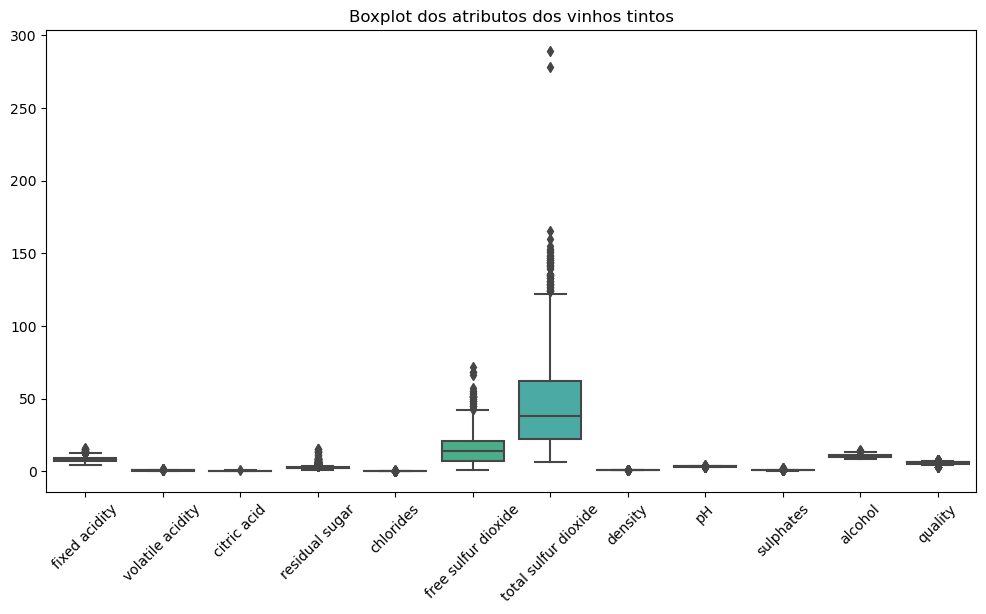

In [4]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tintos)
plt.title('Boxplot dos atributos dos vinhos tintos')
plt.xticks(rotation=45)
plt.show()

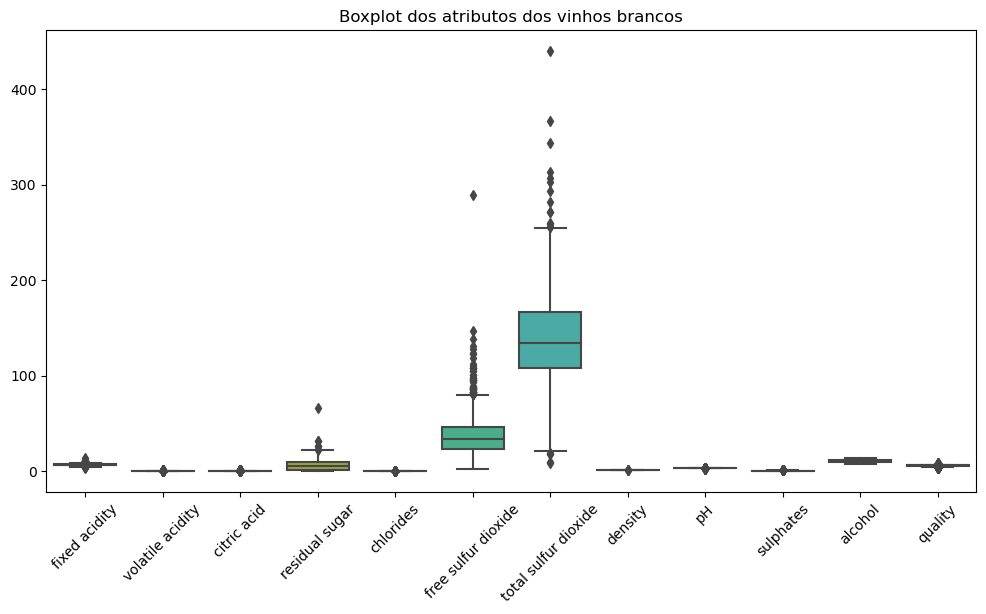

In [5]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_brancos)
plt.title('Boxplot dos atributos dos vinhos brancos')
plt.xticks(rotation=45)
plt.show()

In [6]:
resultado_verificação = pd.concat([df_tintos.isna().sum(), df_brancos.isna().sum()], axis=1)
resultado_verificação.columns = ['Vinhos Tintos', 'Vinhos Brancos']

In [7]:
resultado_verificação

,Vinhos Tintos,Vinhos Brancos
fixed acidity,0,0
volatile acidity,0,0
citric acid,0,0
residual sugar,0,0
chlorides,0,0
free sulfur dioxide,0,0
total sulfur dioxide,0,0
density,0,0
pH,0,0
sulphates,0,0


In [8]:
mapeamento_qualidade = {3: 'Ruim', 4: 'Ruim', 5: 'Média', 6: 'Média', 7: 'Boa', 8: 'Boa', 9: 'Boa'}
df_tintos['quality'] = df_tintos['quality'].replace(mapeamento_qualidade)
df_brancos['quality'] = df_brancos['quality'].replace(mapeamento_qualidade)

In [9]:
df_tintos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Média
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Média
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Média
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Média
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Média


In [10]:
df_brancos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Média
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Média
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Média
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Média
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Média


In [11]:
print(df_tintos['quality'].unique())


['Média' 'Boa' 'Ruim']


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir os dados em conjunto de treinamento e teste
X = df_tintos.drop('quality', axis=1)
y = df_tintos['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

# Inicializar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=75)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Gerar relatório de classificação
print("Relatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_pred))

Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

         Boa       0.65      0.47      0.55        64
       Média       0.89      0.96      0.93       403
        Ruim       1.00      0.08      0.14        13

    accuracy                           0.87       480
   macro avg       0.85      0.50      0.54       480
weighted avg       0.86      0.87      0.85       480



In [19]:
# Fazer previsões para todo o DataFrame
previsoes_df = rf_model.predict(df_tintos.drop('quality', axis=1))

# Comparar as previsões com os valores originais
comparacao = pd.DataFrame({'Original': df_tintos['quality'], 'Previsões': previsoes_df})

comparacao.head()

,Original,Previsões
0,Média,Média
1,Média,Média
2,Média,Média
3,Média,Média
4,Média,Média


In [30]:
diferentes = comparacao[comparacao['Original'] != comparacao['Previsões']]
print(diferentes)

     Original Previsões
16        Boa     Média
37        Boa     Média
128       Boa     Média
167      Ruim     Média
170      Ruim     Média
...       ...       ...
1521     Ruim     Média
1544      Boa     Média
1549      Boa     Média
1555      Boa     Média
1586    Média       Boa

[62 rows x 2 columns]
